In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [17]:
# Load your training and testing data with a semicolon delimiter
train_data = pd.read_csv('train_data_3p.csv', delimiter=';')
test_data = pd.read_csv('test_data_3p.csv', delimiter=';')

In [18]:
train_data.tail(10)

,ct scan,cropped ct scan,roi mask ct scan,classification
1534,1.3.6.1.4.1.9590.100.1.2.398510539611405601424...,1.3.6.1.4.1.9590.100.1.2.275982981411695551937...,1.3.6.1.4.1.9590.100.1.2.275982981411695551937...,4
1535,1.3.6.1.4.1.9590.100.1.2.327261889611833044623...,1.3.6.1.4.1.9590.100.1.2.689558302137605335110...,1.3.6.1.4.1.9590.100.1.2.689558302137605335110...,4
1536,1.3.6.1.4.1.9590.100.1.2.148920323810559075320...,1.3.6.1.4.1.9590.100.1.2.347949749311400992306...,1.3.6.1.4.1.9590.100.1.2.347949749311400992306...,2
1537,1.3.6.1.4.1.9590.100.1.2.141379766611952338808...,1.3.6.1.4.1.9590.100.1.2.471800501113278079404...,1.3.6.1.4.1.9590.100.1.2.471800501113278079404...,2
1538,1.3.6.1.4.1.9590.100.1.2.163878893312280121829...,1.3.6.1.4.1.9590.100.1.2.336349754511972262635...,1.3.6.1.4.1.9590.100.1.2.336349754511972262635...,5
1539,1.3.6.1.4.1.9590.100.1.2.215164923711360518726...,1.3.6.1.4.1.9590.100.1.2.126466180112225633704...,1.3.6.1.4.1.9590.100.1.2.126466180112225633704...,5
1540,1.3.6.1.4.1.9590.100.1.2.398227953312611741920...,1.3.6.1.4.1.9590.100.1.2.144395473912570122935...,1.3.6.1.4.1.9590.100.1.2.144395473912570122935...,2
1541,1.3.6.1.4.1.9590.100.1.2.832140770136026940308...,1.3.6.1.4.1.9590.100.1.2.177833786212905547113...,1.3.6.1.4.1.9590.100.1.2.177833786212905547113...,2
1542,1.3.6.1.4.1.9590.100.1.2.114030713125639071286...,1.3.6.1.4.1.9590.100.1.2.420697654133217172227...,1.3.6.1.4.1.9590.100.1.2.420697654133217172227...,4
1543,1.3.6.1.4.1.9590.100.1.2.197835155813429240930...,1.3.6.1.4.1.9590.100.1.2.376397880911533038033...,1.3.6.1.4.1.9590.100.1.2.376397880911533038033...,4


In [19]:
test_data.tail(10)

,ct scan,cropped ct scan,roi mask ct scan,classification
316,1.3.6.1.4.1.9590.100.1.2.267631872912076578535...,1.3.6.1.4.1.9590.100.1.2.115163798412033576942...,1.3.6.1.4.1.9590.100.1.2.115163798412033576942...,4
317,1.3.6.1.4.1.9590.100.1.2.171130805912113865022...,1.3.6.1.4.1.9590.100.1.2.969547553134480777268...,1.3.6.1.4.1.9590.100.1.2.969547553134480777268...,4
318,1.3.6.1.4.1.9590.100.1.2.127823446114126149027...,1.3.6.1.4.1.9590.100.1.2.364806155210887696726...,1.3.6.1.4.1.9590.100.1.2.364806155210887696726...,3
319,1.3.6.1.4.1.9590.100.1.2.284356402310994259807...,1.3.6.1.4.1.9590.100.1.2.993548952115960407215...,1.3.6.1.4.1.9590.100.1.2.993548952115960407215...,3
320,1.3.6.1.4.1.9590.100.1.2.165100488610511635540...,1.3.6.1.4.1.9590.100.1.2.189733200912008359037...,1.3.6.1.4.1.9590.100.1.2.189733200912008359037...,4
321,1.3.6.1.4.1.9590.100.1.2.242128209412592948513...,1.3.6.1.4.1.9590.100.1.2.526198631111753026131...,1.3.6.1.4.1.9590.100.1.2.526198631111753026131...,4
322,1.3.6.1.4.1.9590.100.1.2.277098686410919869923...,1.3.6.1.4.1.9590.100.1.2.355286671810515664909...,1.3.6.1.4.1.9590.100.1.2.355286671810515664909...,3
323,1.3.6.1.4.1.9590.100.1.2.258951180113994815379...,1.3.6.1.4.1.9590.100.1.2.366216590611306753640...,1.3.6.1.4.1.9590.100.1.2.366216590611306753640...,3
324,1.3.6.1.4.1.9590.100.1.2.232308535910657861814...,1.3.6.1.4.1.9590.100.1.2.275923704411531002833...,1.3.6.1.4.1.9590.100.1.2.275923704411531002833...,3
325,1.3.6.1.4.1.9590.100.1.2.220517698812723136111...,1.3.6.1.4.1.9590.100.1.2.415945278010571172614...,1.3.6.1.4.1.9590.100.1.2.415945278010571172614...,3


In [20]:
# Define the directory containing the images
image_directory = 'jpeg'  # Adjust this to the path of your "jpeg" directory

# Define the column names in your CSV file that contain the file paths
image_column_names = ["ct scan", "cropped ct scan", "roi mask ct scan"]

In [21]:
# Define a function to preprocess the data
def preprocess_data(data, image_column_names, image_directory, target_size=(224, 224), batch_size=32):
    datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    
    image_data = []
    labels = []  # Store the labels for each image
    
    for _, row in data.iterrows():
        for column_name in image_column_names:
            file_location = os.path.join(image_directory, row[column_name])
            image = load_img(file_location, target_size=target_size)
            image_array = img_to_array(image)
            image_data.append(image_array)
            labels.append(row['classification'])  # Assign the label to the image
    
    X = np.array(image_data)
    
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(labels)  # Use the labels collected
    
    data_generator = datagen.flow(X, y, batch_size=batch_size)
    
    return data_generator, label_encoder

In [22]:
# Preprocess the training and testing data
train_data_generator, label_encoder = preprocess_data(train_data, image_column_names, image_directory)
test_data_generator, _ = preprocess_data(test_data, image_column_names, image_directory)


In [23]:
# Build the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Train the model and collect training history
history = model.fit(train_data_generator, epochs=20, validation_data=test_data_generator)

Epoch 1/20
145/145 [==============================] - 50s 339ms/step - loss: 2.7191 - accuracy: 0.3187 - val_loss: 1.5225 - val_accuracy: 0.3303
Epoch 2/20
145/145 [==============================] - 49s 337ms/step - loss: 1.2580 - accuracy: 0.4862 - val_loss: 1.5949 - val_accuracy: 0.3364
Epoch 3/20
145/145 [==============================] - 49s 335ms/step - loss: 0.8469 - accuracy: 0.6798 - val_loss: 1.9105 - val_accuracy: 0.2638
Epoch 4/20
145/145 [==============================] - 49s 340ms/step - loss: 0.5678 - accuracy: 0.8012 - val_loss: 2.1341 - val_accuracy: 0.2751
Epoch 5/20
145/145 [==============================] - 49s 340ms/step - loss: 0.4037 - accuracy: 0.8685 - val_loss: 2.5005 - val_accuracy: 0.2914
Epoch 6/20
145/145 [==============================] - 49s 341ms/step - loss: 0.2736 - accuracy: 0.9106 - val_loss: 2.8313 - val_accuracy: 0.3016
Epoch 7/20
145/145 [==============================] - 50s 344ms/step - loss: 0.1703 - accuracy: 0.9573 - val_loss: 2.8633 - val_ac

In [26]:
# Extract training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

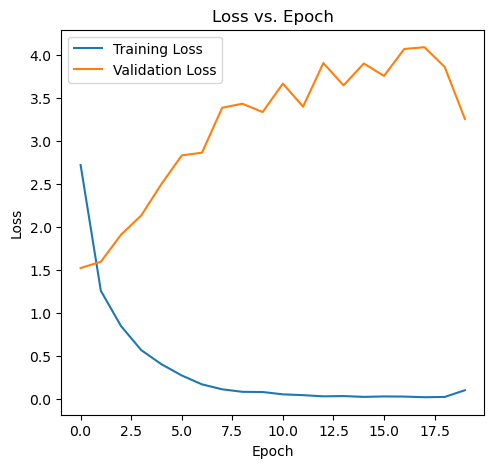

In [27]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

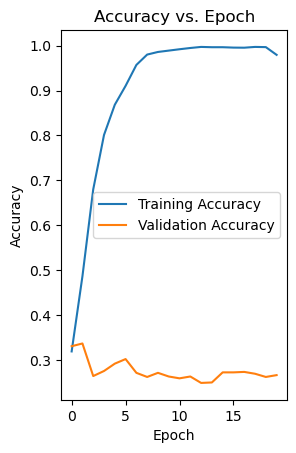

In [28]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [29]:
test_loss, test_accuracy = model.evaluate(test_data_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

31/31 [==============================] - 3s 81ms/step - loss: 3.2554 - accuracy: 0.2658
Test Loss: 3.2554
Test Accuracy: 0.2658
